# Aykırı Gözlem Analizi 

In [51]:
import seaborn as sns 
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include=["float64","int64"]) 
df = df.dropna() #Eksik değerleri bu satırla sildik. Normalde böyle yapmayacağız ama aykırıları bulmak için şimdilik kullandık.
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [52]:
df_table = df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

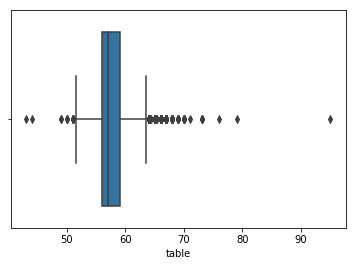

In [53]:
sns.boxplot(x= df_table);

In [54]:
Q1= df_table.quantile(0.25)
Q3= df_table.quantile(0.75)
IQR= Q3-Q1

In [55]:
Q1

56.0

In [56]:
Q3

59.0

In [57]:
IQR

3.0

In [58]:
alt_sinir= Q1- 1.5*IQR
ust_sinir= Q3+ 1.5*IQR

In [59]:
alt_sinir

51.5

In [60]:
ust_sinir

63.5

In [61]:
(df_table< alt_sinir)| (df_table> ust_sinir)

0        False
1        False
2         True
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
53910    False
53911    False
53912    False
53913    False
53914    False
53915    False
53916    False
53917    False
53918    False
53919    False
53920    False
53921    False
53922    False
53923    False
53924    False
53925    False
53926    False
53927    False
53928    False
53929    False
53930    False
53931    False
53932    False
53933    False
53934    False
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [62]:
aykiri_tf = (df_table< alt_sinir)

In [63]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [64]:
df_table[aykiri_tf]

# Tabledaki aykırı değerleri getirdi. 

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [65]:
df_table[aykiri_tf].index
#aykırı değerlerin indexleri 

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

### Aykırı değer problemini çözmek 

Silme

In [66]:
import pandas as pd 

In [67]:
type ( df_table)

pandas.core.series.Series

In [68]:
df_table = pd.DataFrame(df_table)

In [70]:
df_table.shape

(53940, 1)

In [87]:
t_df = df_table[~((df_table < (alt_sinir)) | (df_table > (ust_sinir))).any(axis=1)]
# ~ ifadesi koşulu sağlamayanları al demek için kullanılır. 
t_df.shape

(53335, 1)

Ortalama ile Doldurma

In [88]:
import seaborn as sns 
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include=["float64","int64"]) 
df = df.dropna() #Eksik değerleri bu satırla sildik. Normalde böyle yapmayacağız ama aykırıları bulmak için şimdilik kullandık.
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [89]:
df_table=df["table"]

In [90]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [91]:
df_table[aykiri_tf] #tablodaki aykırı verileri bu şekilde yakalarız. 

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [94]:
df_table.mean()

57.45718390804603

In [95]:
df_table[aykiri_tf]=df_table.mean() # Tüm aykırı gözlemlerin yerine ortalamayı koyma işlemi. Hata önemsiz.

/home/gulce/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [97]:
df_table[aykiri_tf]

1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

Baskılama

In [98]:
import seaborn as sns 
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include=["float64","int64"]) 
df = df.dropna() #Eksik değerleri bu satırla sildik. Normalde böyle yapmayacağız ama aykırıları bulmak için şimdilik kullandık.
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [100]:
df_table= df["table"]

In [101]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [102]:
alt_sinir

51.5

In [103]:
df_table[aykiri_tf]=alt_sinir
# alt sınırın altındaki tüm aykırı değerler alt sınır ile değiştirilmiş oldu. 

/home/gulce/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [105]:
df_table[aykiri_tf]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64

### Çok Değişkenli Aykırı Gözlem Analizi 

In [2]:
import seaborn as sns 
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include=["float64","int64"]) 
df = df.dropna() #Eksik değerleri bu satırla sildik. Normalde böyle yapmayacağız ama aykırıları bulmak için şimdilik kullandık.
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [3]:
import numpy as np 
from sklearn.neighbors import LocalOutlierFactor

In [4]:
clf = LocalOutlierFactor( n_neighbors = 20, contamination= 0.1)

In [5]:
clf.fit_predict(df)

/home/gulce/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


array([-1, -1, -1, ...,  1,  1,  1])

In [6]:
df_scores= clf.negative_outlier_factor_

In [7]:
df_scores[0:10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [8]:
np.sort(df_scores[0:10])

array([-1.62278873, -1.59732899, -1.58352526, -1.33002541, -1.30712521,
       -1.28428162, -1.28422952, -1.28408436, -1.27351342, -1.26458706])

In [9]:
np.sort(df_scores)[0:20]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

In [10]:
esik_deger = np.sort(df_scores)[13]

In [19]:
aykiri_tf = df_scores >esik_deger 

In [20]:
aykiri_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [21]:
#yeni_df= df[ df_scores>esik_deger]
#yeni_df
# Esik değerin üzerinde olan yani koşulu sağlayan tüm değerleri aldık. 

In [22]:
yeni_df= df[ df_scores<esik_deger]
yeni_df
# aykiri gözlemler 
# Çok değişkenli olarak aykırı gözlmeleri çektiğimiz için bir önceki örneğe göre çok daha az gözlem geldi 

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


Baskılama Yöntemi 

(BU KISIM İLERİ SEVİYE BİLGİDİR! İYİ ÖĞREN)

In [23]:
#yeni_df= df[ df_scores<esik_deger]
#yeni_df

In [24]:
df[df_scores== esik_deger]

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


In [34]:
baski_deger =df[df_scores== esik_deger]

In [26]:
aykirilar = df[~aykiri_tf]

In [27]:
aykirilar # Görüldüğü gibi aykirilar bir dataFRame 

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [28]:
# Elimizdeki mevcut aykırıların yerine eşik değerleri atayacak old. için indexlerde bir problem olabilir. 
# İndex prob giderebilmek için 
# Önce elimizdeki aykırılar dataframeini indexsiz bir arraya geçireceğiz. 
# Sonra baskı gözlemini de arrayleştirip atama işlemi yapacağız. 
# Son basamakta aykırı değerleri baskı değerler ile değiştireceğiz. 

In [29]:
aykirilar.to_records( index= False )

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.45, 68.6, 57. ,   756, 4.73,  4.5 ,  3.19),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [38]:
res = aykirilar.to_records( index= False )
res

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.45, 68.6, 57. ,   756, 4.73,  4.5 ,  3.19),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [39]:
res[:] = baski_deger.to_records( index= False )
# Biraz önce oluşturduğum tüm res lerin yerine baskı değeri yerleştirecek. 

In [40]:
res

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [43]:
df [ ~aykiri_tf]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [44]:
# res i oluşturduk ama görüldüğü gibi aykırılarda bir değişiklik yok. Şimdi res.array i DataFrame e 
#çevirmemeiz ve aykiri değerlerin yerine basitçe atamamız gerekiyor. 

In [46]:
import pandas as pd
df[~aykiri_tf]= pd.DataFrame(res, index=df[~aykiri_tf].index)

In [47]:
df[~aykiri_tf] #atama gerçekleşti

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
31230,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19


Eksik Veri 

Eksik Veri Analizi (Hızlı Çözüm)

In [2]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [7]:
# Değişkenlere göre eksik veri sorgulama
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [8]:
# Eksik olmayan veriler 
df.notnull().sum()

V1    7
V2    6
V3    7
dtype: int64

In [11]:
# Tüm eksik verilerin sayısı 
df.isnull().sum().sum()

7

In [12]:
# Eksikleri barındıran gözlem değerlerine gitmek. Milyonlarca veri old bu kullanılır. 
df.isnull()

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [13]:
# df.isnull() bu sorguyu DataFrame içine koyarsak bana koşulu sağlayan elemanları getirir. 
#any fonk ise sadece bir değer varsa bilr getir anlamındadır. 
df[df.isnull().any(axis=1)]
#Sorgu çalıştığında bünyesinde en az bir eksik veri olan tüm elemanlar geldi. 

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [14]:
# Hepsi dolu olanları getir 
df[df.notnull().all(axis=1)]


,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [17]:
# üsttekiyle aynı işlem 
df[df["V1"].notnull() & df["V2"].notnull() &df["V3"].notnull() ]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [19]:
# Eksik gözlemlerin silinmesi 
df.dropna()
# Tüm eksik veriler silinir. Fakat kalıcı değildir. 

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [20]:
df 

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [22]:
df.dropna(inplace=True)
df
# inplace=True olduğunda kalıcı silinir. 

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


Basit değer atama 

In [23]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [25]:
df["V1"].mean()

6.0

In [27]:
df["V1"].fillna(df["V1"].mean())
# Eksik değerlerin yerini kendi ort ile doldurdu . 

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [28]:
df["V2"].fillna(0)

0     7.0
1     0.0
2     5.0
3     8.0
4    12.0
5     0.0
6     0.0
7     2.0
8     3.0
Name: V2, dtype: float64

Otomatik doldurma (Elimizde binlerce leman varsa kullanmakiçin) 

In [29]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [31]:
# ÖNEMLİ
df.apply(lambda x : x.fillna(x.mean()), axis=0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


Eksik Veri yapısını görselleştirme 

In [32]:
!pip install missingno 

In [33]:
import missingno as msno

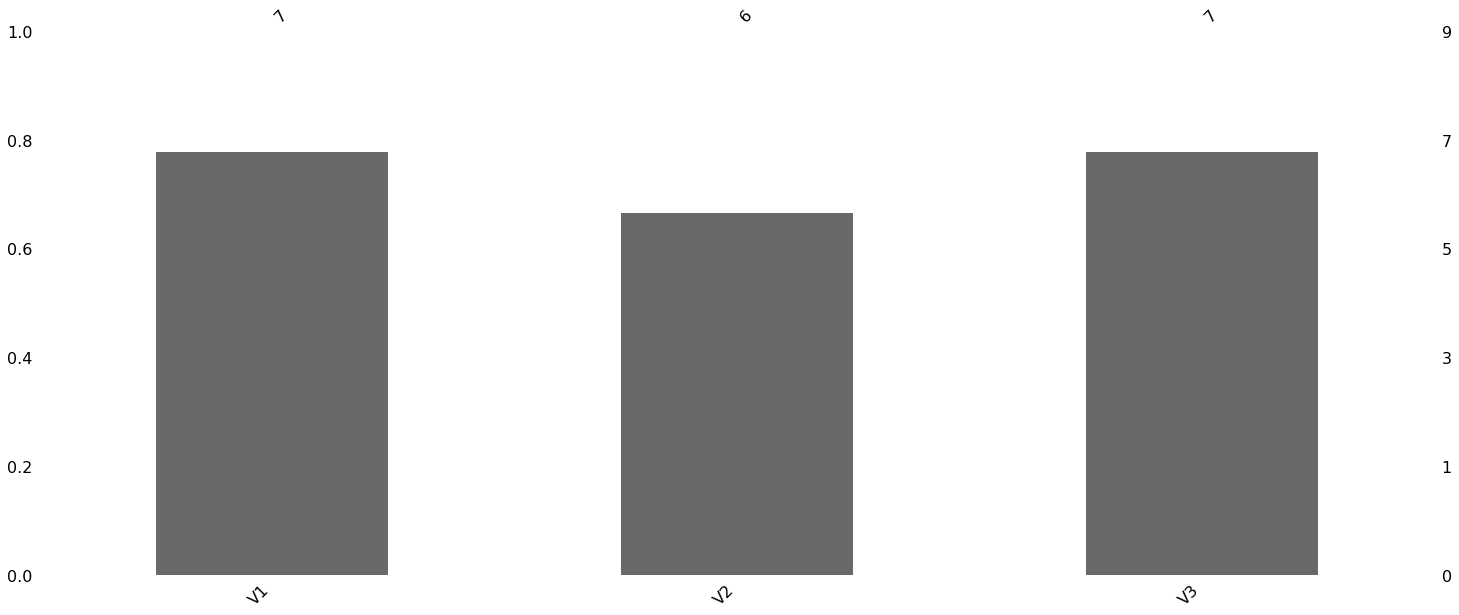

In [35]:
msno.bar(df);
#Soldaki eksen %lik değeri, sağdaki eksen toplam değer sayısını ifade eder. Üstteki sayılar kaç dolu 
#değer old.

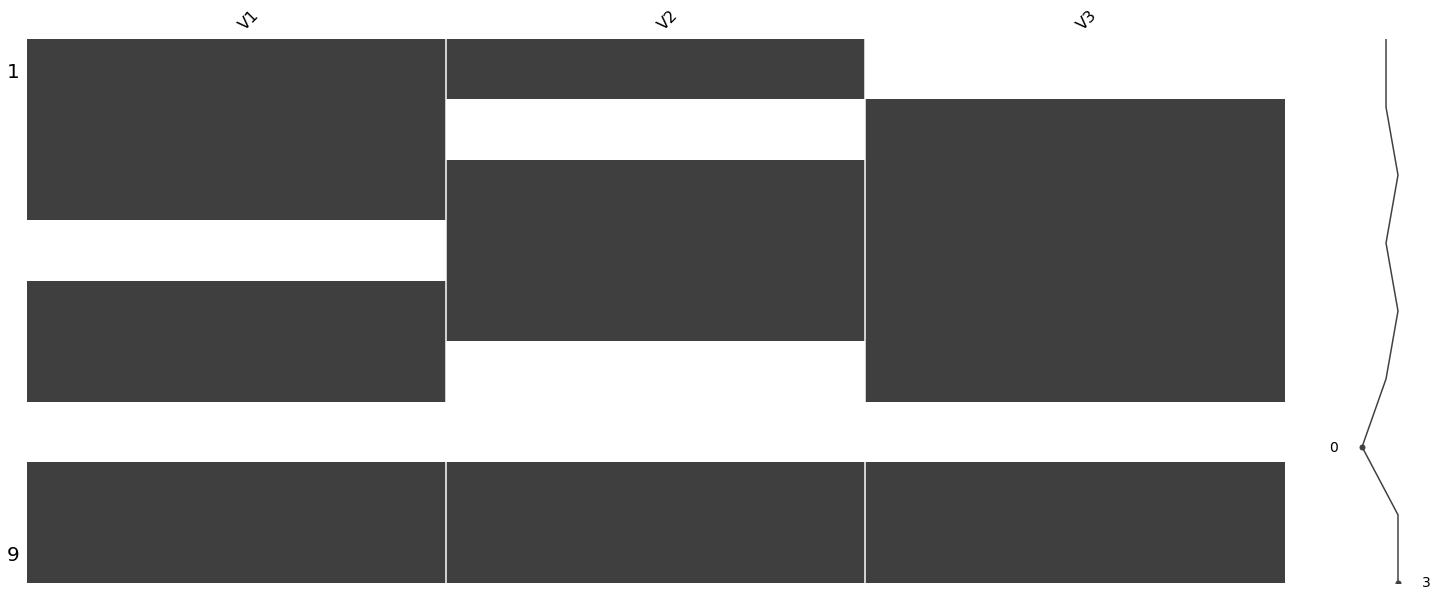

In [36]:
msno.matrix(df);
#Göz yordamıylaboşlukları yakalamamızı sağlar.

In [38]:
import seaborn as sns
df= sns.load_dataset("planets")
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [42]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

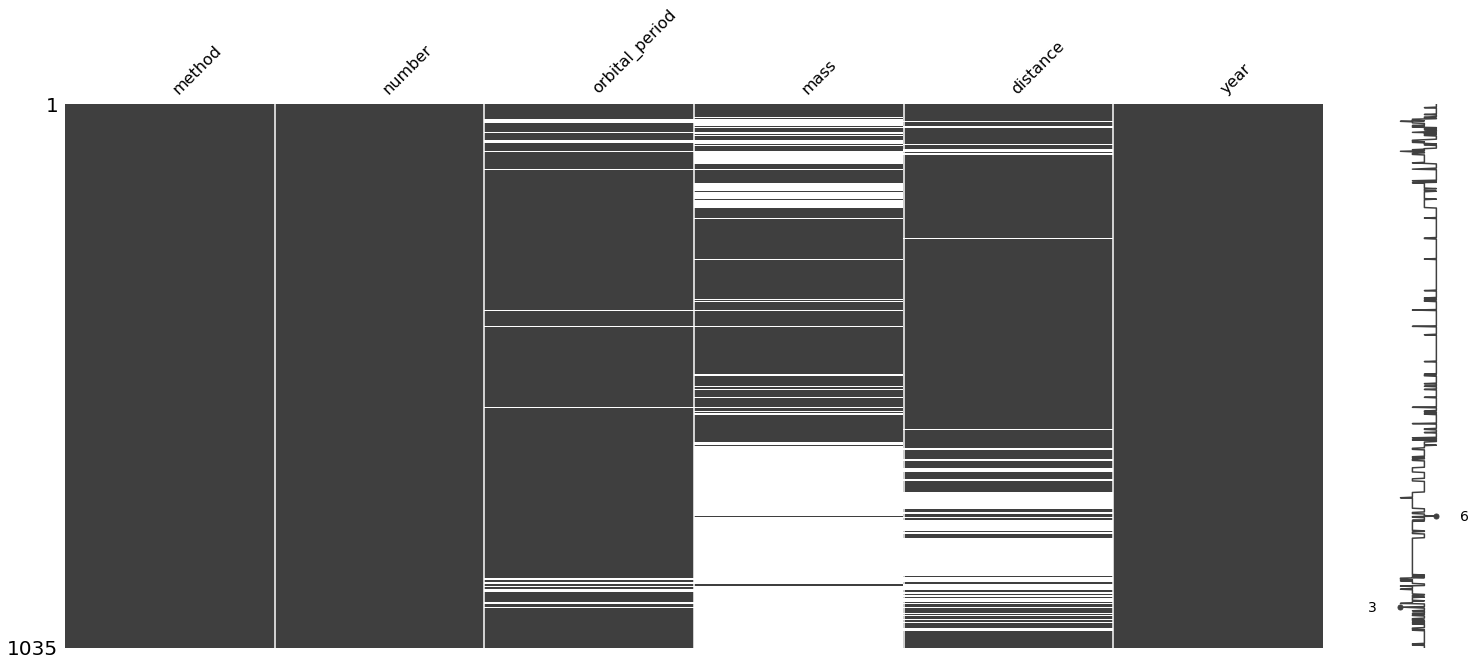

In [43]:
msno.matrix(df);

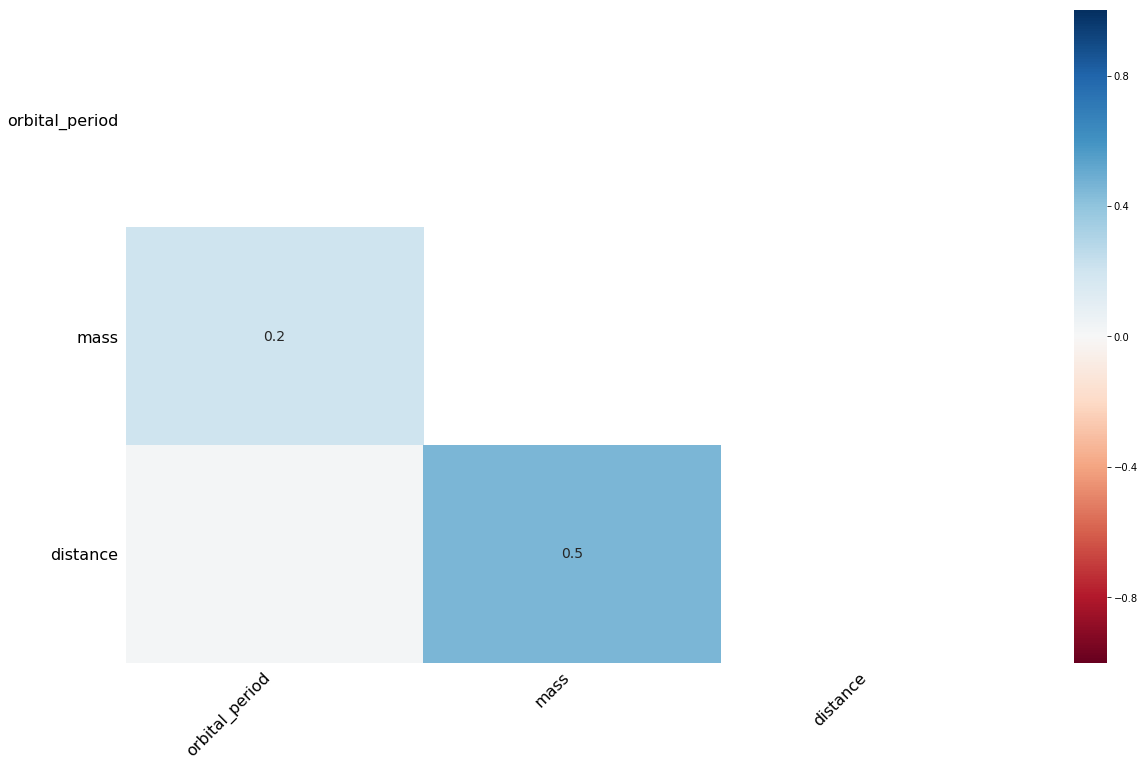

In [45]:
msno.heatmap(df);
# Birbiriyle ilişkiler ivar mı sorusuna cevap verir
# mass ve orbital period 0.2 
# mass ve distance 0.5
# Burada doldurma ve ya silme işlemi şu aşamada yapılmamalıdır.
#Eğer yapılacaksa bu değişkenlerin bağımlılığı incelenmelidir. Kredi kartı ve harcama örneği gibi 

### Silme Yöntemleri 

In [46]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [47]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [48]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [49]:
# Bütün değerleri eksik olan verileri sil 
df.dropna(how="all")

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [50]:
df["sil_beni"]=np.nan

In [51]:
df

,V1,V2,V3,sil_beni
0,1.0,7.0,NaN,NaN
1,3.0,NaN,12.0,NaN
2,6.0,5.0,5.0,NaN
3,NaN,8.0,6.0,NaN
4,7.0,12.0,14.0,NaN
5,1.0,NaN,7.0,NaN
6,NaN,NaN,NaN,NaN
7,9.0,2.0,2.0,NaN
8,15.0,3.0,31.0,NaN


In [52]:
# Sütun bazında silme
df.dropna(axis=1 , how="all")

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [54]:
# kalıcı silmek için. 
df.dropna(axis=1, how="all", inplace=True )
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


Basit Değer Atama

In [55]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [56]:
# Birinci yol 
df.apply(lambda x : x.fillna(x.mean()), axis=0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [57]:
# İkinci yol 
df.fillna(df.mean()[:])

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [64]:
df.fillna(df.mean()["V1":"V2"])
#V1-V2 yi ort ile doldur. 

,V1,V2,V3
0,1.0,7.000000,NaN
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,NaN
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [67]:
df["V3"].fillna(df.median()["V3"])
#v3 ü kendi medyanı ile doldur.

0     7.0
1    12.0
2     5.0
3     6.0
4    14.0
5     7.0
6     7.0
7     2.0
8    31.0
Name: V3, dtype: float64

In [72]:
# Üçüncü yol 
df.where(pd.notna(df), df.mean(), axis=1)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


## Katagorik Değişkenler Kırlımında Değer Atama 

In [73]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [75]:
# departmanların maas ortalamasını bul 
df.groupby("departman")["maas"].mean()

departman
IK    4.666667
IT    7.000000
Name: maas, dtype: float64

In [84]:
# Her maaştaki eksikliği kendi maaş katagorisindeki ortalamaya göre doldurmak!
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"))

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: maas, dtype: float64

KAtegorik Değişkenler için eksik değer atama

In [107]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V4 = np.array(["IT",np.nan,"IK","IK","IK","IK","IK","IT","IT"], dtype=object)

df = pd.DataFrame(
        {"maas" : V1,
        "departman" : V4}        
)

df

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


In [108]:
df["departman"].mode()
# en sık kullanılan ile doldur. 

0    IK
dtype: object

In [109]:
df["departman"].fillna(df["departman"].mode()[0])

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [110]:
df 

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


In [112]:
# Öndesindeki ya da sonrasındaki eleman ile doldurma 
df.fillna(method="bfill")
# Sonraki 

,maas,departman
0,1.0,IT
1,3.0,IK
2,6.0,IK
3,7.0,IK
4,7.0,IK
5,1.0,IK
6,9.0,IK
7,9.0,IT
8,15.0,IT


In [113]:
df.fillna(method="ffill")
# Önceki 

,maas,departman
0,1.0,IT
1,3.0,IT
2,6.0,IK
3,6.0,IK
4,7.0,IK
5,1.0,IK
6,1.0,IK
7,9.0,IT
8,15.0,IT


### Tahmine Dayalı Değer Atama

Makine Öğrenmesi Yapıları ile: 

In [6]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.head())
df.isnull().sum()

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [7]:
!pip install ycimpute

In [8]:
from ycimpute.imputer import knnimput

In [9]:
var_names = list(df)

In [10]:
import numpy as np
n_df = np.array(df)

In [11]:
n_df[0:10]

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       [ 1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ],
       [ 0.    ,  3.    , 35.    ,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  3.    ,     nan,  0.    ,  0.    ,  8.4583],
       [ 0.    ,  1.    , 54.    ,  0.    ,  0.    , 51.8625],
       [ 0.    ,  3.    ,  2.    ,  3.    ,  1.    , 21.075 ],
       [ 1.    ,  3.    , 27.    ,  0.    ,  2.    , 11.1333],
       [ 1.    ,  2.    , 14.    ,  1.    ,  0.    , 30.0708]])

In [12]:
n_df.shape

(891, 6)

In [13]:
dff = knnimput.KNN(k = 4).complete(n_df)

Imputing row 1/891 with 0 missing, elapsed time: 0.240
Imputing row 101/891 with 0 missing, elapsed time: 0.242
Imputing row 201/891 with 0 missing, elapsed time: 0.243
Imputing row 301/891 with 1 missing, elapsed time: 0.244
Imputing row 401/891 with 0 missing, elapsed time: 0.245
Imputing row 501/891 with 0 missing, elapsed time: 0.247
Imputing row 601/891 with 0 missing, elapsed time: 0.248
Imputing row 701/891 with 0 missing, elapsed time: 0.249
Imputing row 801/891 with 0 missing, elapsed time: 0.250


In [14]:
type(dff)

numpy.ndarray

In [15]:
import pandas as pd
dff = pd.DataFrame(dff, columns = var_names)

In [16]:
type(dff)

pandas.core.frame.DataFrame

In [17]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [18]:
# Random forest 

In [19]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])

In [20]:
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [21]:
var_names=list(df) 

In [22]:
import numpy as np
n_df = np.array(df)

In [23]:
from ycimpute.imputer import iterforest
dff = iterforest.IterImput().complete(n_df)

AttributeError: module 'ycimpute.imputer.iterforest' has no attribute 'IterImput'

In [ ]:
dff = pd.DataFrame(dff, columns = var_names)

In [24]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [25]:
# EM 

In [22]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])

In [29]:
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [23]:
from ycimpute.imputer import EM

In [24]:
var_names=list(df) 

In [25]:
import numpy as np
n_df = np.array(df)

In [26]:
dff = EM().complete(n_df)

In [27]:
import pandas as pd
dff = pd.DataFrame(dff, columns = var_names)

In [28]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

# DEĞİŞKEN STANDARDİLASYONU

### Standartlaştırma: 
Değişkenin değerleri değişir. Belirli bir formata sokulur. Fakat taşımış old bilginin özütü mevcut kalacaktır. Örn bir inde 80 sırada ise standartlaştırma yapıldığında ort , std sapma, varyans gibi özellikleri değişse de indexi yine 80 olacaktır.  

### Dönüştürme : 
Genelde veri setinin özütünü bozar. Numarik temsiller yaratır. (örn: kadın:1 , Erkek:0 ) yani bilginin yapısı değişmiş olur. 

In [30]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3})

df = df.astype(float)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


### Standardizasyon : 

In [32]:
from sklearn import preprocessing 

In [33]:
# Scale değerleri belirli bir standarta göre dönüştürür. Ve bu dönüşüm makine öğrenmesinde kolaylık sağlar
preprocessing.scale(df)

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

In [34]:
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


### Normalizasyon 

In [35]:
# Normalizasyon değerleri 0-1 arasıdaki değerlere dönüştürür.
preprocessing.normalize(df)

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])

### Max-Min Dönüşümü 

In [39]:
scaler= preprocessing.MinMaxScaler(feature_range=(10,20))

In [40]:
scaler.fit_transform(df)

array([[10.        , 12.85714286, 11.11111111],
       [13.33333333, 12.85714286, 17.77777778],
       [18.33333333, 10.        , 10.        ],
       [16.66666667, 14.28571429, 11.11111111],
       [20.        , 20.        , 20.        ]])

## Değişken Dönüşümleri 

Her bir Standardilizasyon bir değişken dönüşümüdür. 

In [81]:
import seaborn as sns
df= sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 0-1 Dönüşmü

In [ ]:
# En sık kullanılan dönüşümlerden birisi 

In [43]:
from sklearn.preprocessing import LabelEncoder
lbe= LabelEncoder()

In [45]:
lbe.fit_transform(df["sex"])

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0])

In [47]:
df["yeni_sex"]= lbe.fit_transform(df["sex"])
df

,total_bill,tip,sex,smoker,day,time,size,yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0
5,25.29,4.71,Male,No,Sun,Dinner,4,1
6,8.77,2.00,Male,No,Sun,Dinner,2,1
7,26.88,3.12,Male,No,Sun,Dinner,4,1
8,15.04,1.96,Male,No,Sun,Dinner,2,1
9,14.78,3.23,Male,No,Sun,Dinner,2,1


In [83]:
#ikinci yol 

In [84]:
import seaborn as sns
df= sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [86]:
df["yeni_sex"] = df["sex"].cat.codes
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,1


In [91]:
lbe= preprocessing.LabelEncoder()
df["daha_yeni_sex"]= lbe.fit_transform(df["sex"])
df.head()
# Önemli Bilgi 
# cat.cades fonk yakaladığğı değeri 1 den dönüştürmeye başlar / 
# LabelEncoder fonk yakaladığı değeri 0dan dönüştürmeye başlar.

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,daha_yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0


## 1 ve Diğerleri(0) Dönüşümü 

In [51]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


In [65]:
import numpy as np
df["yeni_day"]= np.where(df["day"].str.contains("Sun"),1,0)
df

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,yeni_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1
5,25.29,4.71,Male,No,Sun,Dinner,4,1,1
6,8.77,2.00,Male,No,Sun,Dinner,2,1,1
7,26.88,3.12,Male,No,Sun,Dinner,4,1,1
8,15.04,1.96,Male,No,Sun,Dinner,2,1,1
9,14.78,3.23,Male,No,Sun,Dinner,2,1,1


## Çok Sınıflı Dönüşüm

In [66]:
from sklearn.preprocessing import LabelEncoder
lbe= LabelEncoder()

In [67]:
lbe.fit_transform(df["day"])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])

# Çok Dikkat
### One-Hot Dönüşümü ve Dummy Değişken Tuzağı

In [68]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,yeni_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1


In [72]:
df_one_hot = pd.get_dummies(df, columns=["sex"], prefix= ["sex"])

In [73]:
df_one_hot.head()

,total_bill,tip,smoker,day,time,size,yeni_sex,yeni_day,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,1,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,1,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,1,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1,0,1


In [75]:
df_one_hot = pd.get_dummies(df, columns=["day"], prefix= ["day"])
df_one_hot

,total_bill,tip,sex,smoker,time,size,yeni_sex,yeni_day,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,1,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,1,1,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,1,1,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,1,1,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,1,0,0,0,1
5,25.29,4.71,Male,No,Dinner,4,1,1,0,0,0,1
6,8.77,2.00,Male,No,Dinner,2,1,1,0,0,0,1
7,26.88,3.12,Male,No,Dinner,4,1,1,0,0,0,1
8,15.04,1.96,Male,No,Dinner,2,1,1,0,0,0,1
9,14.78,3.23,Male,No,Dinner,2,1,1,0,0,0,1


# Veri Standardizasyonu - Dönüşümü